Information

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:

1 if the building has at least a claim over the insured period.

0 if the building doesn’t have a claim over the insured period.
Please Find attached dataset and description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [19]:
df1 = pd.read_csv('train_data.csv')
df2 = pd.read_csv('test_data.csv')

#  Data exploration
df1.head() was used to check the content of the data afterwhich the code sns.pairplot(df1,hue='Claim') was use to check the Correlation which gave insight on columns to drop when cleaning the data. 

In [5]:
df1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
df1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

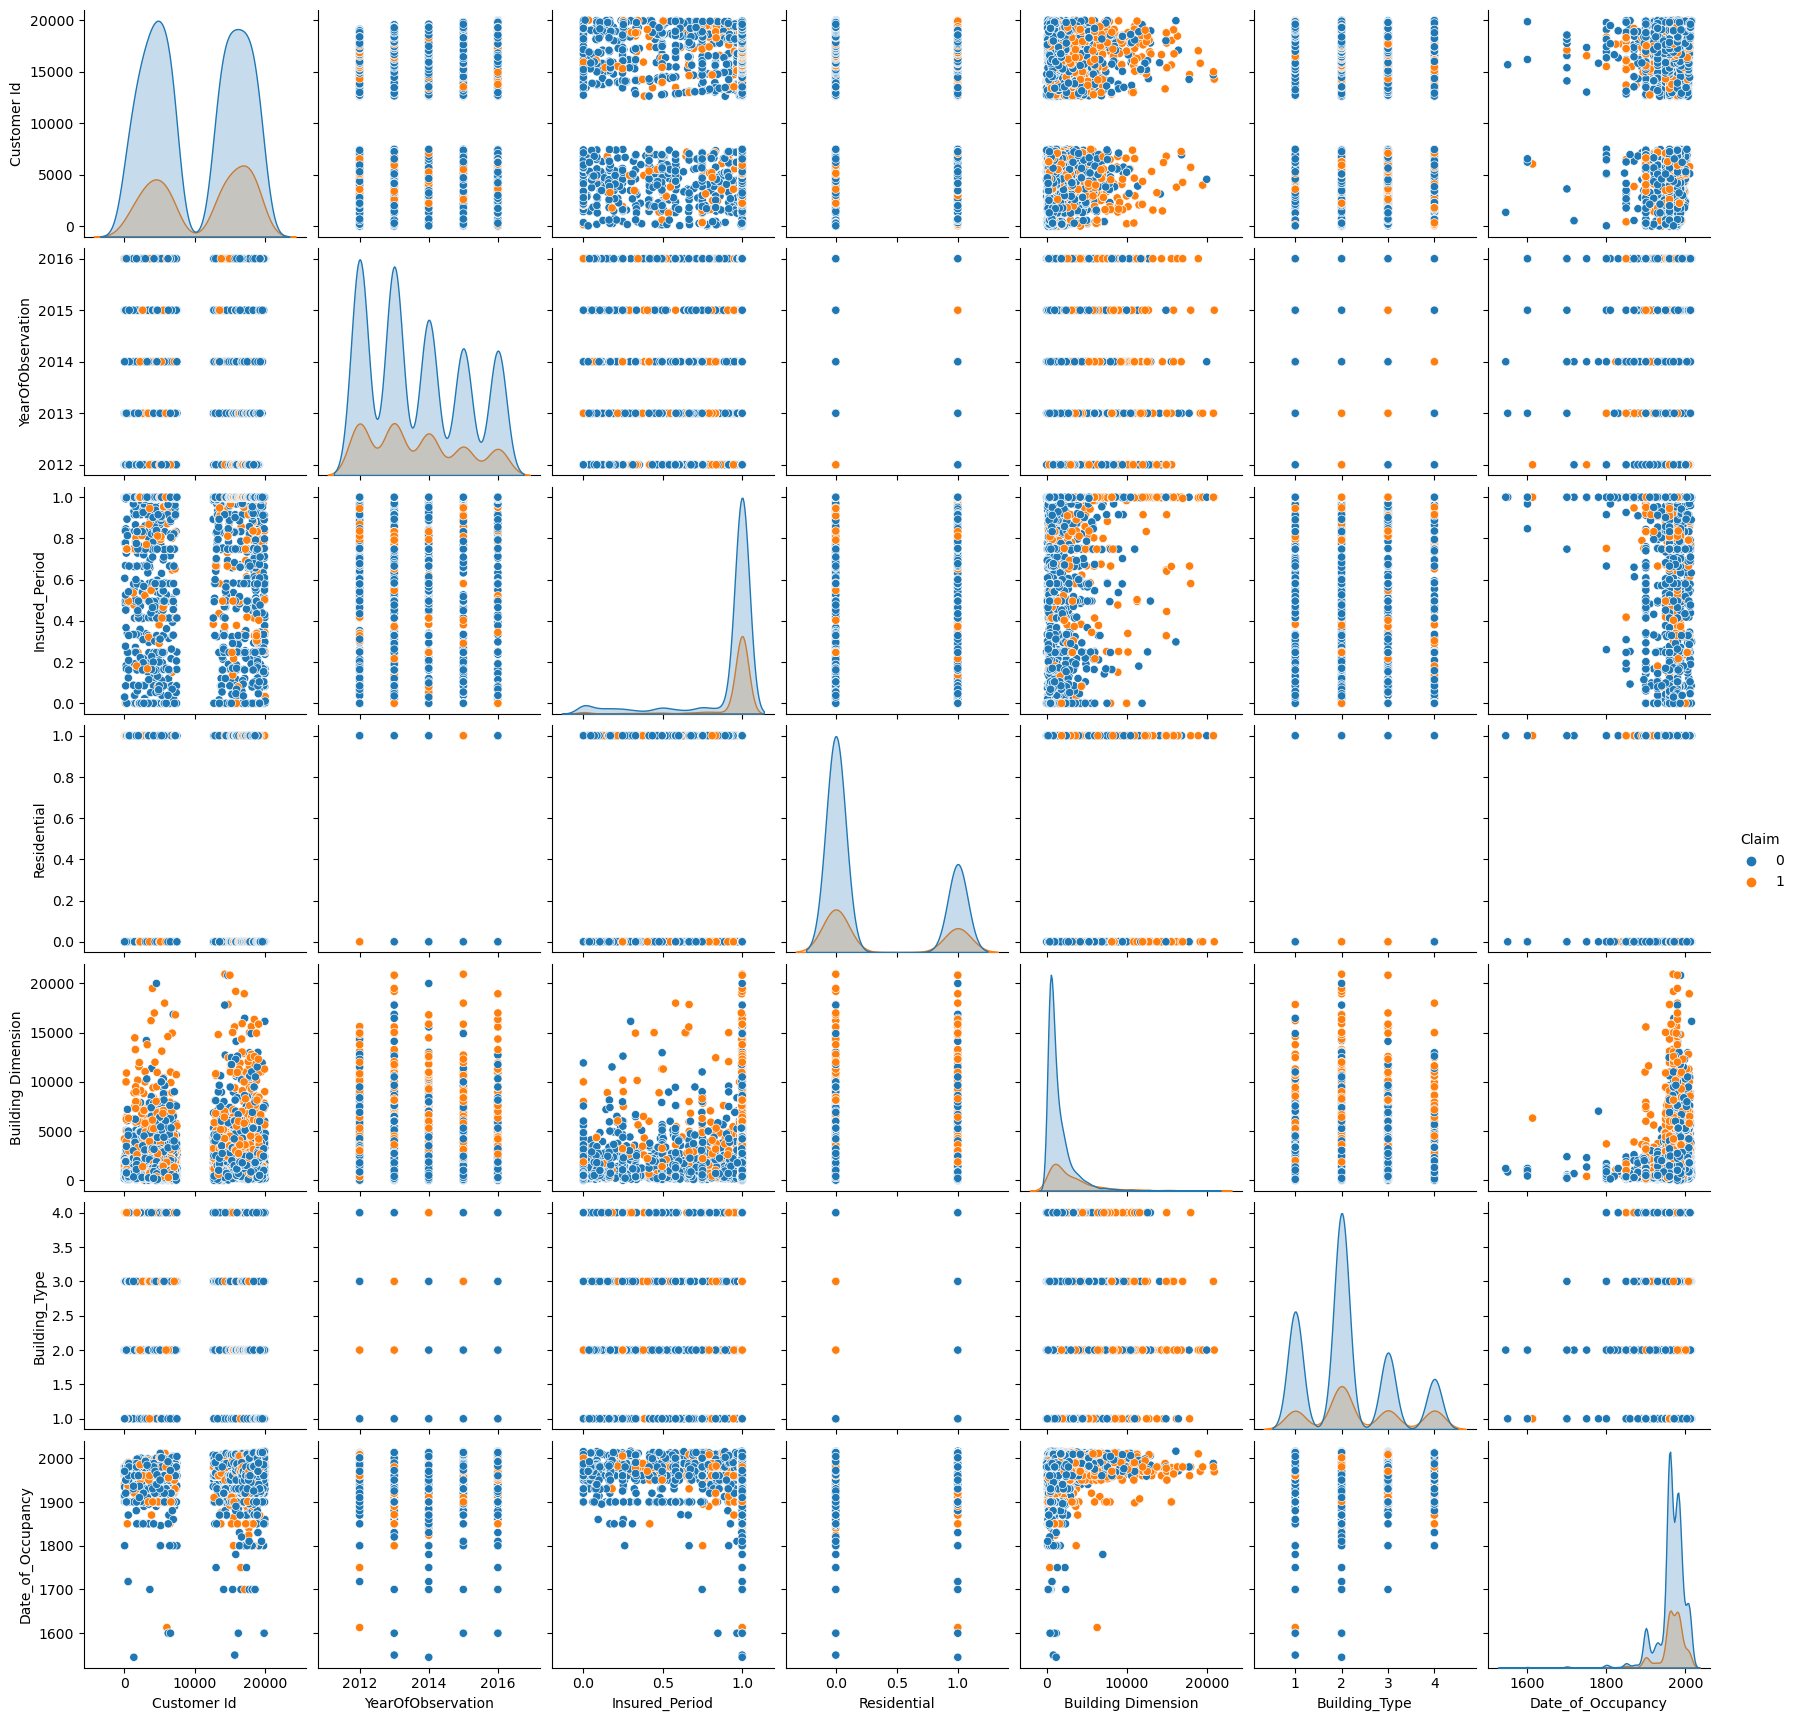

In [21]:
sns.pairplot(df1,hue='Claim')

# Data cleaning
While cleaning the data columns that were not relevant as shown by the correlation chat above were dropped 

In [7]:
x=df1.drop(columns=['Claim','Geo_Code','Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows'],axis=1)
y=df1['Claim']

In [8]:
x['Date_of_Occupancy'].fillna('0',inplace=True)
x['Building Dimension'].fillna(df1['Building Dimension'].mean(),inplace=True)

In [9]:
x.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
0,14663,2013,1.0,0,290.0,1,1960.0
1,2037,2015,1.0,0,490.0,1,1850.0
2,3802,2014,1.0,0,595.0,1,1960.0
3,3834,2013,1.0,0,2840.0,1,1960.0
4,5053,2014,1.0,0,680.0,1,1800.0


In [10]:
x.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
dtype: int64

# Model building
before building our model we start by spliting it in to two (train and test) using train_test_split from sklearn library,after spliting and training the data was fitted into logisiticRegression model and use to make prediction. 
Then we checked the confusion_matrix and accuracy_score.

In [11]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(x_test)

In [17]:
gen= pd.DataFrame(y_pred)
gen.head()

,0
0,0
1,0
2,0
3,0
4,0


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1098
           1       0.62      0.12      0.20       334

    accuracy                           0.78      1432
   macro avg       0.70      0.55      0.54      1432
weighted avg       0.75      0.78      0.71      1432



In [18]:
print(confusion_matrix(y_test,y_pred))

[[1073   25]
 [ 294   40]]


# Merging of dataframes
The indepent variable was converted into a databframe and merged with df2, the name of the column was changed to Claim and the first cloumn 'Claim' was move to the end, a countn of Claim was taken and the infomation was represented graphically using sns.countplot. 

In [29]:
dev=pd.concat([gen,df2], axis=1)
dev.dropna(inplace=True)
dev

,0,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,0.0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,0.0,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,0.0,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,0.0,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,0.0,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0.0,H7968,2013,1.000000,0,V,V,V,U,1050.0,1,1980.0,.,42186
1428,0.0,H7969,2016,0.997268,0,V,V,V,U,1050.0,1,1980.0,.,42186
1429,0.0,H7970,2016,1.000000,0,V,N,O,R,1700.0,1,1963.0,5,42186
1430,0.0,H10094,2015,1.000000,0,V,V,V,U,900.0,1,1980.0,.,42187


In [32]:
dev.rename(columns={dev.columns[0]: 'claim'}, inplace=True)

In [33]:
dev.head(3)

,claim,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,0.0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,0.0,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,0.0,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310


In [34]:
dev = pd.concat([dev.iloc[:, 1:], dev.iloc[:, 0]], axis=1)

In [36]:
dev.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,claim
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310,0.0
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310,0.0
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310,0.0
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321,0.0
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321,0.0


In [39]:
value_counts =dev['claim'].value_counts()


In [40]:
print(value_counts)

0.0    1071
1.0      54
Name: claim, dtype: int64


In [38]:
dev['claim'].sum()

54.0

<Axes: xlabel='claim', ylabel='count'>

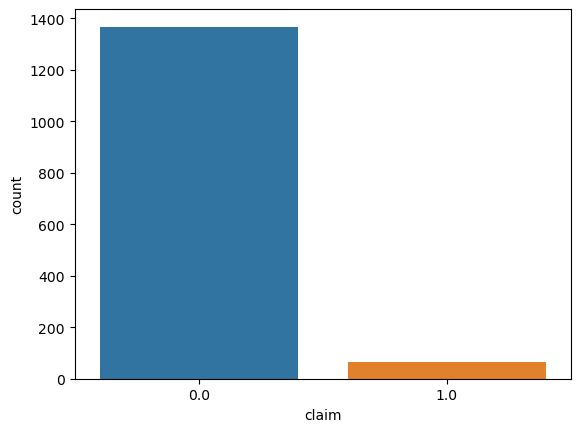

In [148]:
sns.countplot(x='claim',data = result)